In [12]:
import numpy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [19]:
def read_site_emis(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    emis_day = csv_data[:, 1]
    emis_day = emis_day.astype(float)
    
    valid_indices = numpy.where(~numpy.isnan(emis_day))[0]
    valid_values = emis_day[valid_indices]
    interpolator = interp1d(valid_indices, valid_values, kind='nearest', fill_value='extrapolate')
    emis_day_imp = interpolator(numpy.arange(len(emis_day)))
    
    csv_data[:, 1] = emis_day_imp
    return csv_data

Text(0, 0.5, 'MOD11L2 Emissivity')

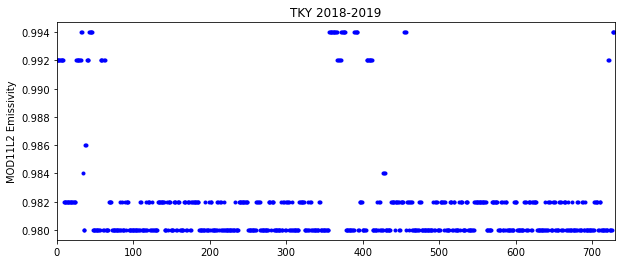

In [21]:
# demo
plt.figure(figsize=(10,4))
plt.plot(numpy.arange(365*2), csv_data_imp[:,1].astype(float), '.', color='blue')
plt.title('TKY 2018-2019')
plt.xlim(0, 365*2)
plt.ylabel('MOD11L2 Emissivity')

In [23]:
for site_name in ['TKY','CRK', 'GCK', 'GDK']:
    MOD11L2_EMIS_SITE_CSV = '/disk2/Data/MOD11L2_Emissivity/' + site_name + '_MOD11L2_Emissiviry.csv'
    csv_data_imp = read_site_emis(MOD11L2_EMIS_SITE_CSV)
    numpy.savetxt(MOD11L2_EMIS_SITE_CSV[:-4]+'_withoutNaN.csv', csv_data_imp, delimiter=",", fmt='%s')